In [1]:
# load library
library("randomForest")

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [9]:
# import your data file
a <- read.csv("path/to/your/file.csv")

In [10]:
# print out the first few rows and dimensions of the dataset
head(a)
dim(a)

pixel_id,X,Y,heart_name,heart_number,spot,group,X806.5699,X782.5696,X828.5508,...,X260.2856,X1161.3395,X750.4645,X575.2675,X1047.8058,X691.4282,X735.454,X277.1408,X426.3555,X584.2993
38264,0.75,-3.00,C3H16_B16,infected_heart3,spot_4_center,infected_C,21292.54,12149.77,17694.47,...,324.3126,10.46170,257.8061,100.13339,57.53933,232.3991,164.3981,292.1803,139.7384,310.1146
38265,0.80,-3.00,C3H16_B16,infected_heart3,spot_4_center,infected_C,32240.43,17092.35,27700.56,...,233.7912,0.00000,228.1028,59.72768,31.85476,185.4402,218.4326,310.0151,154.1543,155.2920
59845,-14.30,-1.95,C3H14_B47,infected_heart2,spot_1_center,infected_C,29788.05,18178.55,18954.97,...,366.8973,0.00000,361.0470,62.68178,29.25150,381.1052,145.4217,245.7126,463.8452,205.5962
60887,-14.30,-1.90,C3H14_B47,infected_heart2,spot_1_center,infected_C,29086.28,16689.47,23187.98,...,155.5260,40.15929,206.6378,74.47724,54.76267,378.2275,196.4155,257.7496,515.4993,221.2412
60888,-14.25,-1.90,C3H14_B47,infected_heart2,spot_1_center,infected_C,25579.73,17924.80,18223.62,...,201.0872,18.42631,185.0643,192.27457,11.21602,256.3661,197.0814,406.9812,453.4475,136.1945
71611,0.90,-1.40,C3H16_B16,infected_heart3,spot_1_center,infected_C,28517.03,13671.71,19983.08,...,227.7976,30.78346,214.7146,156.22607,433.27723,345.5444,187.7791,345.5444,284.7470,289.3645


[1] 14145   830

In [11]:
# subset the data group: naive center vs infected center
# change the groups as needed
b<-droplevels(subset(a, a$group==c("naive_C")|a$group==c("infected_C")))

In [13]:
# perform random forest based on the minimum size group
# features start from column 8 to column 830
rfm1000b <- randomForest(b$group ~., data= b[,8:830], importance=TRUE, ntree=1000, do.trace=TRUE, na.omit=TRUE, strata=b$group, sampsize=rep(min(table(b$group)), nlevels(b$group)))

ntree      OOB      1      2
    1:  28.12% 22.22% 29.49%
    2:  20.93% 19.23% 21.36%
    3:  14.97% 14.29% 15.18%
    4:   9.93% 10.26%  9.82%
    5:   9.62% 13.95%  7.96%
    6:   5.06% 11.36%  2.63%
    7:   3.12%  6.52%  1.75%
    8:   4.35%  8.51%  2.63%
    9:   3.70% 10.42%  0.88%
   10:   6.17% 14.58%  2.63%
   11:   4.94%  8.33%  3.51%
   12:   2.47%  6.25%  0.88%
   13:   3.70%  8.33%  1.75%
   14:   3.70%  8.33%  1.75%
   15:   3.70% 10.42%  0.88%
   16:   3.09%  8.33%  0.88%
   17:   3.09%  8.33%  0.88%
   18:   2.47%  6.25%  0.88%
   19:   2.47%  6.25%  0.88%
   20:   2.47%  6.25%  0.88%
   21:   1.85%  4.17%  0.88%
   22:   1.23%  4.17%  0.00%
   23:   1.85%  4.17%  0.88%
   24:   1.23%  2.08%  0.88%
   25:   1.23%  2.08%  0.88%
   26:   2.47%  6.25%  0.88%
   27:   2.47%  6.25%  0.88%
   28:   2.47%  6.25%  0.88%
   29:   2.47%  6.25%  0.88%
   30:   2.47%  6.25%  0.88%
   31:   1.85%  4.17%  0.88%
   32:   1.23%  4.17%  0.00%
   33:   1.23%  4.17%  0.00%
   34:   1.23%

In [14]:
# print out the random forest results
rfm1000b


Call:
 randomForest(formula = b$group ~ ., data = b[, 8:830], importance = TRUE,      ntree = 1000, do.trace = TRUE, na.omit = TRUE, strata = b$group,      sampsize = rep(min(table(b$group)), nlevels(b$group))) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 28

        OOB estimate of  error rate: 0%
Confusion matrix:
           infected_C naive_C class.error
infected_C         48       0           0
naive_C             0     114           0

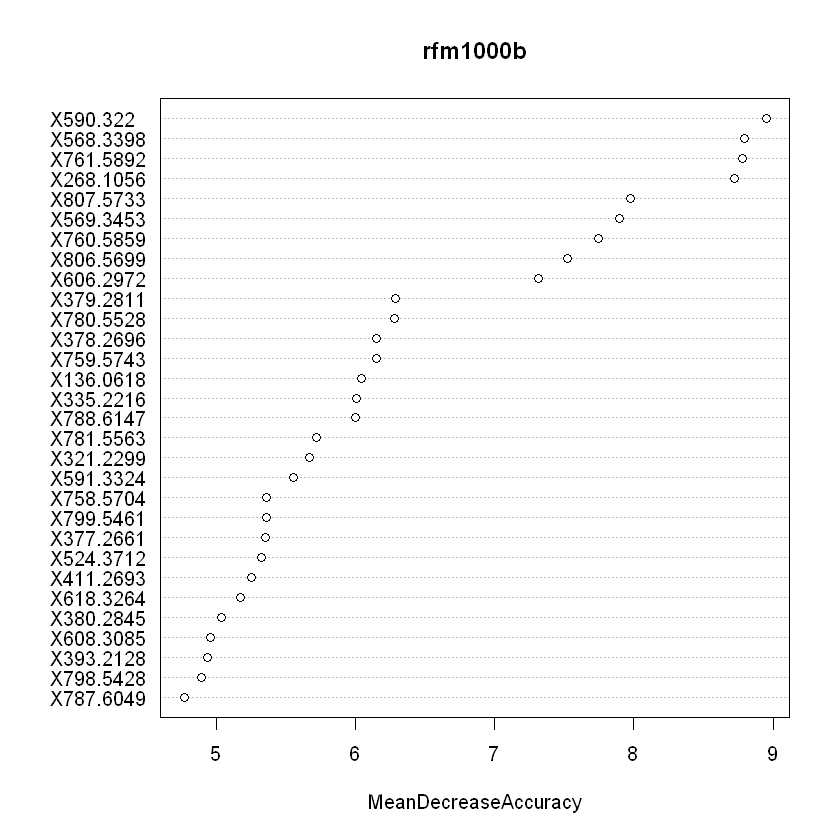

In [15]:
# print out the top important features
varimpb <- varImpPlot(rfm1000b, type = 1)

In [16]:
# save a csv file of the results to your folder
# change filename based on the groups for analysis
write.csv(varimpb,"path/to/your/folder/RF_result.csv")